In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from src.data.make_dataset import reduce_mem_usage

In [2]:
input_file_path = "../data/raw"
train_df = pd.read_csv(input_file_path + "/train.csv")
weather_df = pd.read_csv(input_file_path + "/weather_train.csv")
building_df = pd.read_csv(input_file_path + "/building_metadata.csv")
train_df = reduce_mem_usage(train_df)
weather_df = reduce_mem_usage(weather_df)
building_df = reduce_mem_usage(building_df)
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
weather_df["timestamp"] = pd.to_datetime(weather_df["timestamp"])
train_df = train_df.merge(building_df, on = "building_id")

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [3]:
train_df["hour"] = train_df["timestamp"].dt.hour
weather_df["hour"] = weather_df["timestamp"].dt.hour

In [4]:
train_df.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,hour
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,0
1,0,0,2016-01-01 01:00:00,0.0,0,Education,7432,2008.0,NaN,1
2,0,0,2016-01-01 02:00:00,0.0,0,Education,7432,2008.0,NaN,2
3,0,0,2016-01-01 03:00:00,0.0,0,Education,7432,2008.0,NaN,3
4,0,0,2016-01-01 04:00:00,0.0,0,Education,7432,2008.0,NaN,4


In [5]:
weather_df.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000,0
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000,1
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000,2
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000,3
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609,4


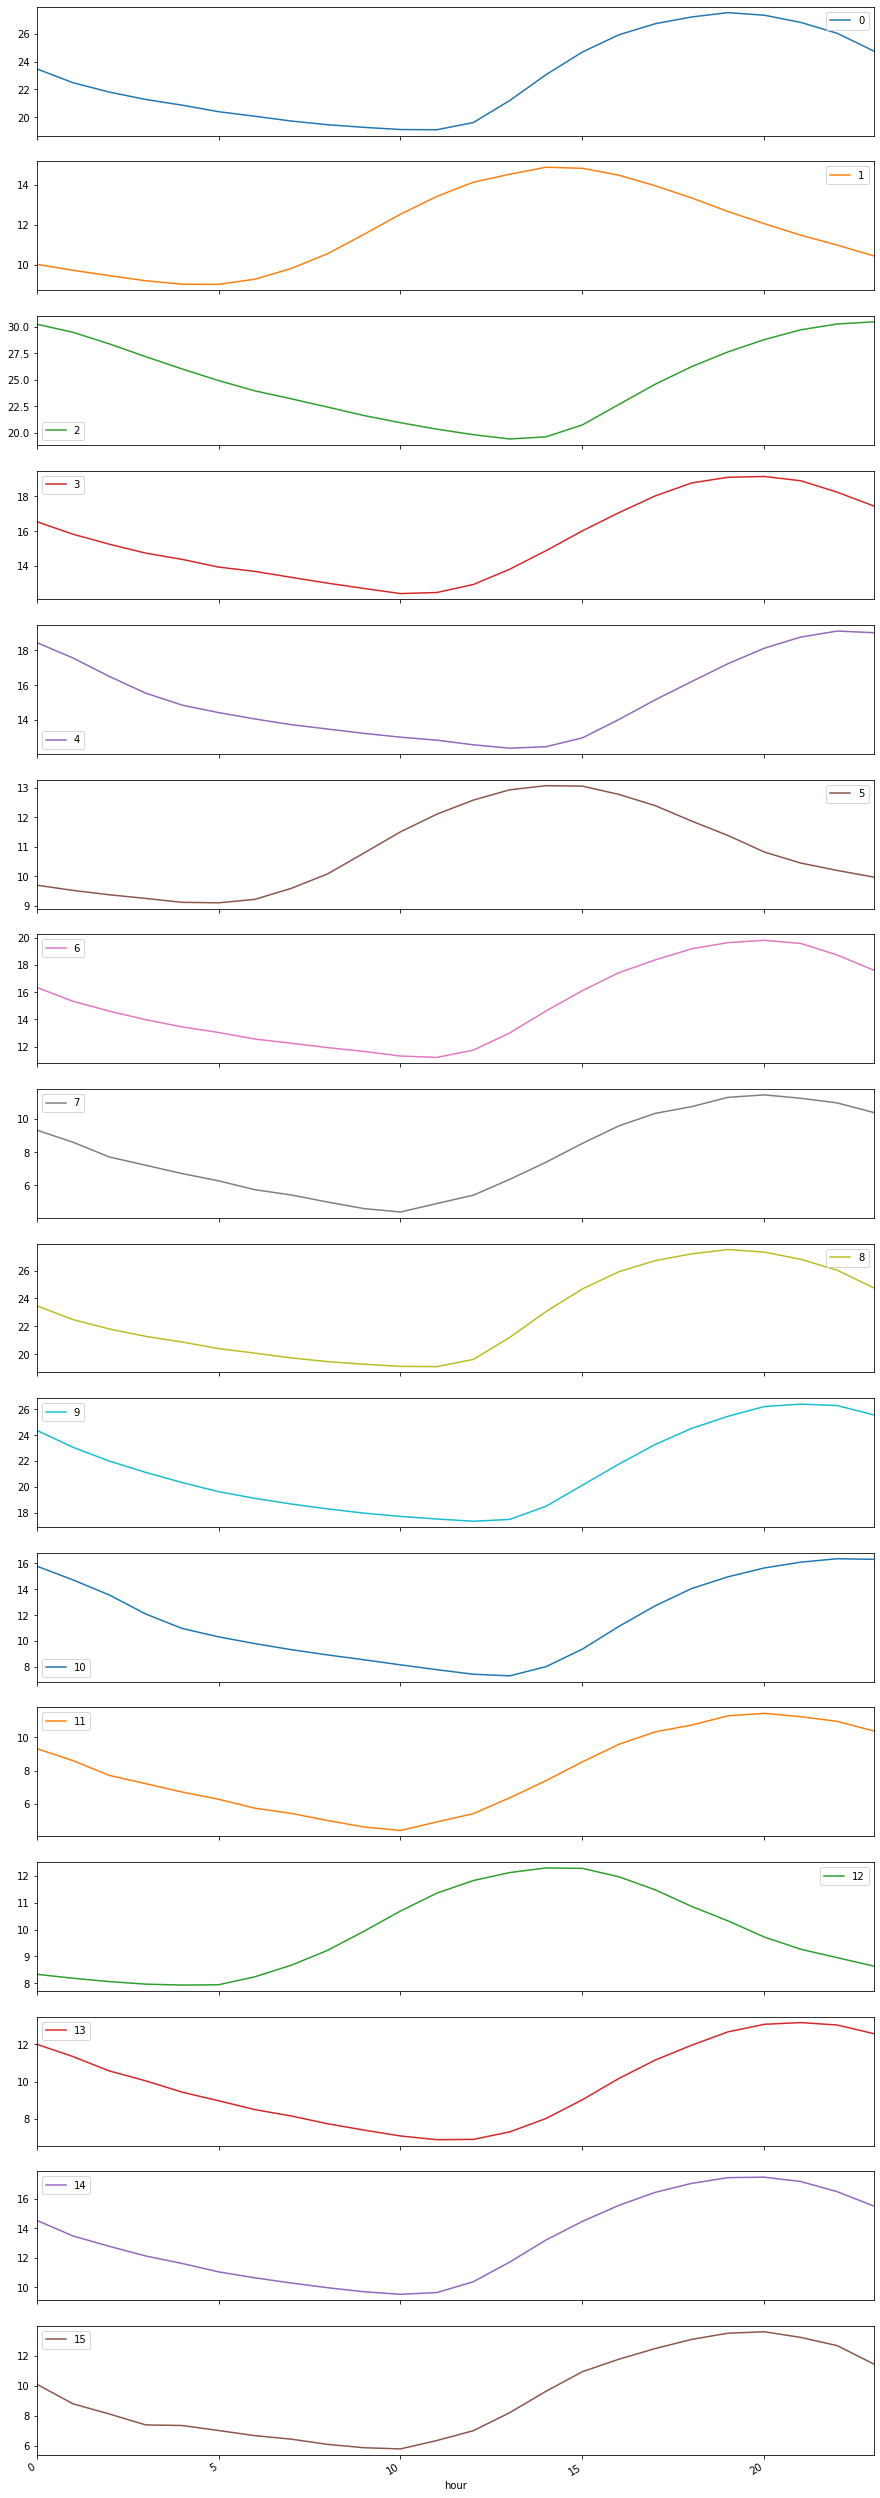

In [6]:
my_plot = weather_df.groupby(["hour", "site_id"])["air_temperature"].mean().unstack().plot(subplots=True, sort_columns=True, figsize=(15,50))

In [7]:
meter_names = {0: "electricity", 1: "chilledwater", 2: "steam", 3: "hotwater"}
train_df["meter"] = train_df["meter"].transform(lambda x : meter_names[x])

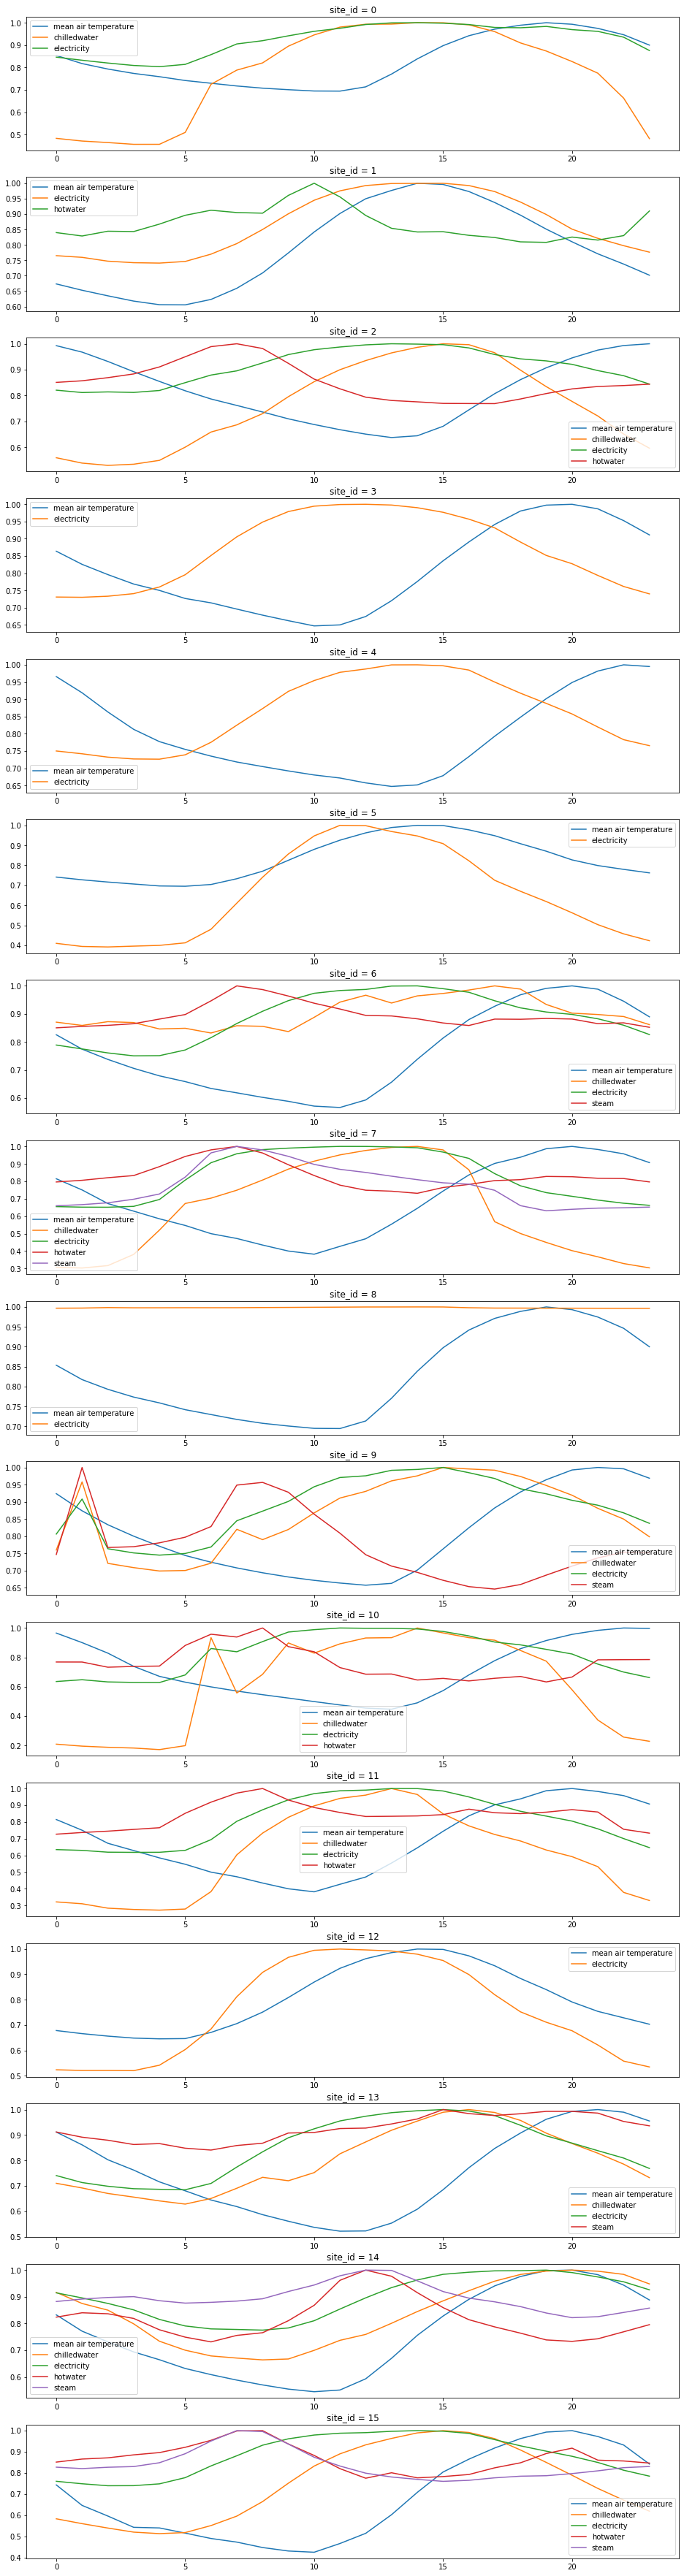

In [8]:
grouped = train_df.groupby(["hour", "site_id", "meter"])["meter_reading"].mean()

site_count = train_df["site_id"].unique().size
fig, axs = plt.subplots(figsize=(16,64), nrows=site_count)
for (site_id, train_per_site), (site_id, weather_per_site), ax in zip(train_df.groupby(["site_id"]), weather_df.groupby(["site_id"]), axs.flatten()):
    ax.set_title('site_id = %d'%site_id)
    mean_air_temperature = weather_per_site.groupby(["hour"])["air_temperature"].mean()
    max_air_temperature = mean_air_temperature.max()
    ax.plot(mean_air_temperature / max_air_temperature, label="mean air temperature")
    ax.legend()
    for meter, per_meter in train_per_site.groupby(["meter"]):
        mean_meter_reading = per_meter.groupby(["hour"])["meter_reading"].mean()
        max_meter_reading = mean_meter_reading.max()
        ax.plot(mean_meter_reading / max_meter_reading, label=meter)
        ax.legend()

plt.show()